## 5章3節：教師付き学習

In [1]:
import numpy as np
import example.chapter5

# set parameter
pi = np.array([0.1, 0.4, 0.5])
theta = np.array([[0.8, 0.2], [0.6, 0.4], [0.3, 0.7]])

# data
data_model = example.chapter5.dice(theta, pi)
x, s = data_model.generate_data(num=10000)

# estimate
supervised = example.chapter5.Supervised_learning()
supervised.estimate(x, s)
print(f"pi: {supervised.pi}")
print(f"theta: {supervised.theta}")


pi: [0.1004 0.3992 0.5004]
theta: [[0.78087649 0.21912351]
 [0.59544088 0.40455912]
 [0.29256595 0.70743405]]


## 5章4節 教師なし学習

In [4]:
import numpy as np
import example.chapter5

# set parameter
pi = np.array([0.1, 0.4, 0.5])
theta = np.array([[0.8, 0.2], [0.6, 0.4], [0.3, 0.7]])

# data
data_model = example.chapter5.dice(theta, pi)
x, s = data_model.generate_data(10000)

# estimate
# initial value
pi = np.array([0.3, 0.5, 0.2])
# theta is known
unsupervised = example.chapter5.Unsupervised_learning(theta, pi)
unsupervised.estimate(x)

# show
print(f"pi: {unsupervised.pi}")
print(f"theta: {unsupervised.theta}")

pi: [0.10231806 0.39317722 0.50450472]
theta: [[0.8 0.2]
 [0.6 0.4]
 [0.3 0.7]]


## 7章　マルコフモデルのパラメータ推定

In [5]:
import numpy as np
import example.chapter7_8
# set parameter
A = np.array([[0.1, 0.7, 0.2], [0.2, 0.1, 0.7], [0.7, 0.2, 0.1]])
B = np.array([[0.9, 0.1], [0.6, 0.4], [0.1, 0.9]])
rho = np.array([1 / 3, 1 / 3, 1 / 3])

# data
model = example.chapter7_8.Markov_dice(A, B, rho)
s, x = model.generate_spots(n=10000)

# estimate
markov = example.chapter7_8.Markov()
markov.estimate(x, s)

# show
print(f"A is {markov.A}")
print(f"B is {markov.B}")


A is [[0.10104012 0.69331352 0.20564636]
 [0.20481203 0.09864662 0.69654135]
 [0.70785498 0.20060423 0.09123867]]
B is [[0.90846954 0.09153046]
 [0.60571429 0.39428571]
 [0.0939577  0.9060423 ]]


## 8章　隠れマルコフモデルのパラメータ推定

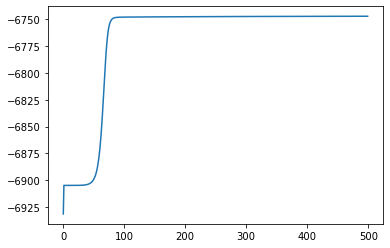

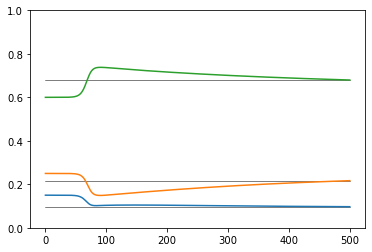

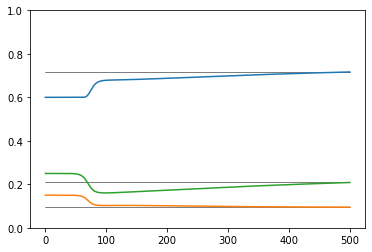

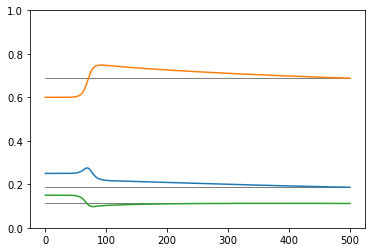

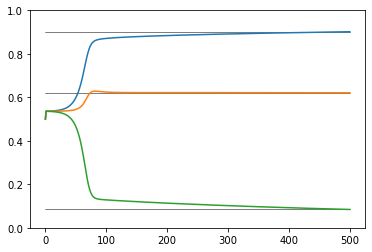

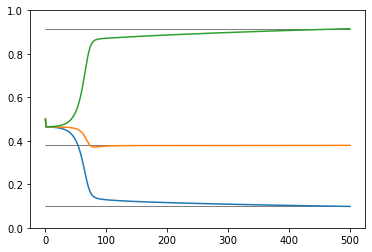

In [1]:
import numpy as np
import example.chapter7_8

# parameter
A = np.array([[0.1, 0.7, 0.2], [0.2, 0.1, 0.7], [0.7, 0.2, 0.1]])
B = np.array([[0.9, 0.1], [0.6, 0.4], [0.1, 0.9]])
rho = np.array([1, 0, 0])
model = example.chapter7_8.Markov_dice(A, B, rho)
s, x = model.generate_spots(n=10000)

# initial value
A = np.array([[0.15, 0.6, 0.25], [0.25, 0.15, 0.6], [0.6, 0.25, 0.15]])
B = np.array([[0.5, 0.5], [0.5, 0.5], [0.5, 0.5]])
rho = np.array([1, 0, 0])
baum_welch = example.chapter7_8.BaumWelch(A, B, rho)

# estimate
baum_welch.scaled_estimate(x, T=500)

# show graph
baum_welch.graph_P()
baum_welch.graph_A(baum_welch.A)
baum_welch.graph_B(baum_welch.B)


## 10章　凸クラスタリング

### 1次元正規分布の場合

The number of used centroids is (27/400) using sigma:(1).


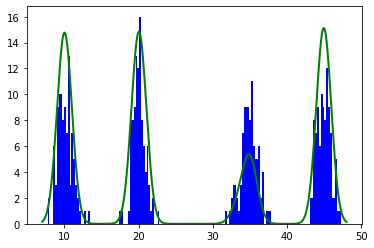

In [3]:
import numpy as np
import example.chapter9_10

# set parameter
K = 4  # number of clusters
N = 100 * K
mu = np.array([10, 20, 35, 45])
sigma = np.array([1, 1, 1, 1])

# data
model = example.chapter9_10.mixed_normal_dice(K, mu, sigma)
X, _, _ = model.generate_data(N)

# estimate
convex = example.chapter9_10.convex_clustering(sigma)
convex.clustering(X)

# show
convex.graph()

### 2次元正規分布の場合

The number of used centroids is (15/400) using sigma:(2).


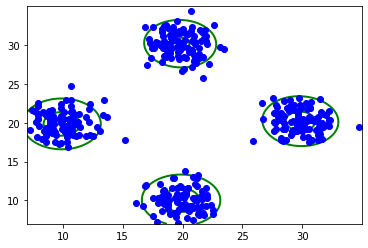

In [1]:
import numpy as np
import example.chapter9_10

# set parameter
K = 4  # number of clusters
N = 100 * K
mu = np.array([[10, 20],
               [20, 10],
               [30, 20],
               [20, 30],
               ])
sigma = np.array([[[2, 0],
                   [0, 2]],
                  [[2, 0],
                   [0, 2]],
                  [[2, 0],
                   [0, 2]],
                  [[2, 0],
                   [0, 2]]
                  ])

# data
model = example.chapter9_10.mixed_normal_dice(K, mu, sigma)
X, _, _ = model.generate_data(N)

# estimate
convex = example.chapter9_10.convex_clustering(sigma)
convex.clustering(X)

# show
convex.graph()